## Observations and Insights 

* **Which are the regimens showing improvements ?
  **ONLY Capomulin and Ramicane are showing improvements in tumor sizes**. On day one, all the mice had a tumor size of 45 g. After 45 days, the average tumor size in Capomulin is 36.23 and in Ramicane, it is 34.95, while, in all other regimen, the average tumor sizes are more than 45. **Metastatic states (secondary spots to which tumour spreads)** are a measure of severity of tumor. Initially (day 0), all the mice had no metastatic states. However, during the course of 45 days, metastatic states increased. Again, **Capomulin and Ramicane are the regimen with the least average metastatic states** (1.48 and 1.25 respectively) compared to other regimen.
  
  
* **Which are the treatments relatively safe** ?
  Some tumor treatments are known to be risky and cost lives. So we, need to ensure that, they are not reducing the tumor size (in avg), not at the cost of taking lives. Initially, all the regimen had either 25 or 24 mice. During the course of the treatment, atleast some mice died in all the regimen. Again, **Capomulin and Ramicane are significantly better** in terms of taking less lives (4 and 5 respectively!) compared to others. Need to mention that **Propriva is the worst, as it took 17 lives, which is a whopping 71%**
  
  
* We could see a **strong positive correlation (0.95) between weight and avg. tumor size.** This has to be read as follows; **tumor size reduces at the cost of weight!** This might be because of the harsh chemicals involved in the treatment. Except Ceftamin, all other treatments resulted in the reduction of average body weights; and the identified best treatments Capomulin(1.31%) and Ramicane (3.50%) belong to the top 3 highest reductions accompanying Infubinol (2.39%)

 
* **There is bias in the experiment!!!** Usually comparison experiments are conducted with same environment for all. In this study, all the regimen had mice of almost equal number (25 or 24), all the mice had exactly same initial body weight. However, the initial average body weights in the regimen do not tally. **The top performing regimen Capomulin and Ramicane have significantly less initial(day 0) average body weights (20 and 20.12 respectively; not only the avg. but also the distribution) compared to that of other regimens. The reason for this needs to be clarified with Research Teams (who conducted this study)**

In [614]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

%matplotlib inline

#To display all outputs in a cell rather than the last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
DF = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

In [615]:
# Checking the number of mice in the DataFrame.
DF['Mouse ID'].value_counts().count()

249

In [616]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Note:- As per the description, for a timepoint, there should be only one entry for any mouse


#Duplicate Mice
duplicate_mice_ids = list(DF[DF.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]['Mouse ID'].unique())
duplicate_mice_ids

['g989']

In [617]:
# Optional: Get all the data for the duplicate mouse ID. 

#Extra:- Duplicated Entries are displayed as follows:
#DF[DF.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]

DF[DF['Mouse ID'].isin(duplicate_mice_ids)]
#13 rows for this mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [618]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Note:- All data corresponding to this mouse is dropped

DF.drop(DF[DF['Mouse ID'].isin(duplicate_mice_ids)].index, axis=0, inplace=True)
#Left with 1880 rows

In [619]:
# Checking the number of mice in the clean DataFrame.
DF['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [620]:
######################################PLEASE READ THIS######################################
#1. Though we are taking a complete data set, it has to be considered as sample NOT population. Reason being, 248 mice represents entire population of mice here to derive the study results
#2. Because of 1, variance formula should be that of sample variance (ddof = 1, losing 1 degree  of freedom as sample mean is derived from the same data)
#3. Because of 1, std deviation formula should be that of sample std deviation (ddof = 1, losing 1 degree  of freedom as sample mean is derived from the same data)
#4. Most importantly, because of 1, SEM is not a relevant statistics here. SEM is the std. error of mean. It is tied to CLT (Central Limit Theorem), which says, the sample mean of "truly" randomly \
####picked ensembles converge to the population mean with std error of mean (SEM) = population std /sqrt(of ensemble size). This is used to derive population std deviation from samples.
####Means, if we know SEM, then std.deviation = SEM*ensemble size. 
####The scipy implementation of SEM is std_dev/sqrt(size of array) is not useful for us. I am using SEM(ddof =1) here, just to match up with std calculation. But, rightfully, we shouldn't take SEM here.

In [621]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Create a group based on 'Drug Regimen'
drug_regimen_grp = DF.groupby('Drug Regimen')
mean = drug_regimen_grp['Tumor Volume (mm3)'].mean()
median = drug_regimen_grp['Tumor Volume (mm3)'].median()
variance = drug_regimen_grp['Tumor Volume (mm3)'].var(ddof=1)
std_dev = drug_regimen_grp['Tumor Volume (mm3)'].std(ddof=1)
sem = drug_regimen_grp['Tumor Volume (mm3)'].apply(lambda x: st.sem(x, ddof=1))

#Combine everything to a DF
summary_stats_method1 = pd.concat([mean, median, variance, std_dev, sem], axis=1)
summary_stats_method1.columns = ['mean', 'median', 'variance', 'std_dev', 'sem']
summary_stats_method1

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [622]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


#Create a group based on 'Drug Regimen'
drug_regimen_grp = DF.groupby('Drug Regimen')
#Aggregate based on the summary stats
summary_stats_method2 = drug_regimen_grp.aggregate(mean=('Tumor Volume (mm3)', 'mean'), median=('Tumor Volume (mm3)', 'median'), variance=('Tumor Volume (mm3)', lambda x:np.var(x, ddof=1)), std_dev = ('Tumor Volume (mm3)', lambda x:np.std(x, ddof=1)), sem = (('Tumor Volume (mm3)', lambda x: st.sem(x, ddof=1))))                  
summary_stats_method2



,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

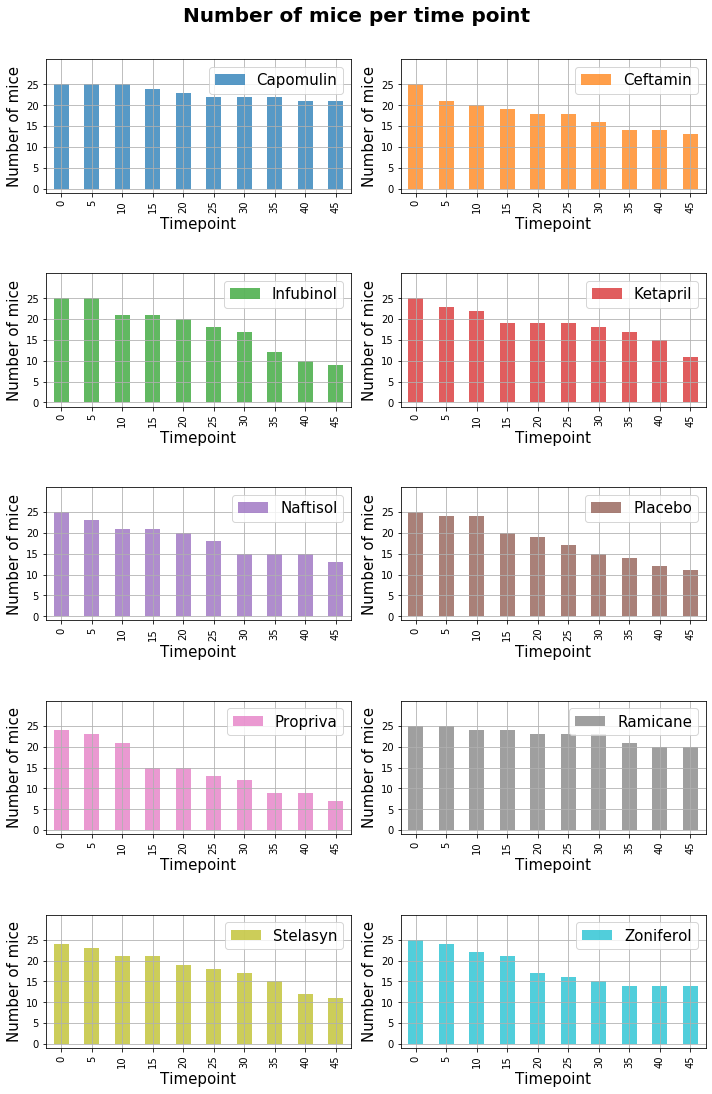

In [623]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.    

#Group DF with 'Drug Regimen' and 'Timepoint'
#Convert the 'Timepoint' index as columns
Timepoint_Regime_Mice_Number = DF.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count()
TS_Regime_Mice_Number = Timepoint_Regime_Mice_Number.unstack(level=-1, fill_value=0) #By default level=-1

axes = TS_Regime_Mice_Number.plot(
                           width=0.5,
                           kind = 'bar',
                           figsize=(10,15),
                           subplots= True,
                           layout=(len(TS_Regime_Mice_Number.columns)//2, 2), #(5,2)
                           grid=True,
                           legend= False, #To get better control on legends
     
                           sharex=False, sharey=False,
                           
                           yticks=np.arange(0, TS_Regime_Mice_Number.max(axis=1).max(axis=0)+1, 5),
                           xlim=(TS_Regime_Mice_Number.index.to_list()[0]-1, TS_Regime_Mice_Number.index.to_list()[-1]+1),
                           ylim=(-1, TS_Regime_Mice_Number.max(axis=1).max(axis=0)+6),
                           alpha=0.75,
                           
                           )      
#Beautification !!!
_=plt.suptitle('Number of mice per time point', fontsize=20, weight='bold', y=1.01)
axes = axes.reshape(TS_Regime_Mice_Number.columns.shape)
_=[ax.legend(loc='upper right',fontsize = 15) for ax in axes]
_=[ax.set_ylabel('Number of mice',fontsize = 15) for ax in axes]
_=[ax.set_xlabel('Timepoint',fontsize = 15) for ax in axes]
_=[ax.set_title("\n") for ax in axes]
_ = plt.tight_layout()

_= plt.savefig('../Images/graph1.png', bbox_inches = "tight" )
plt.show()

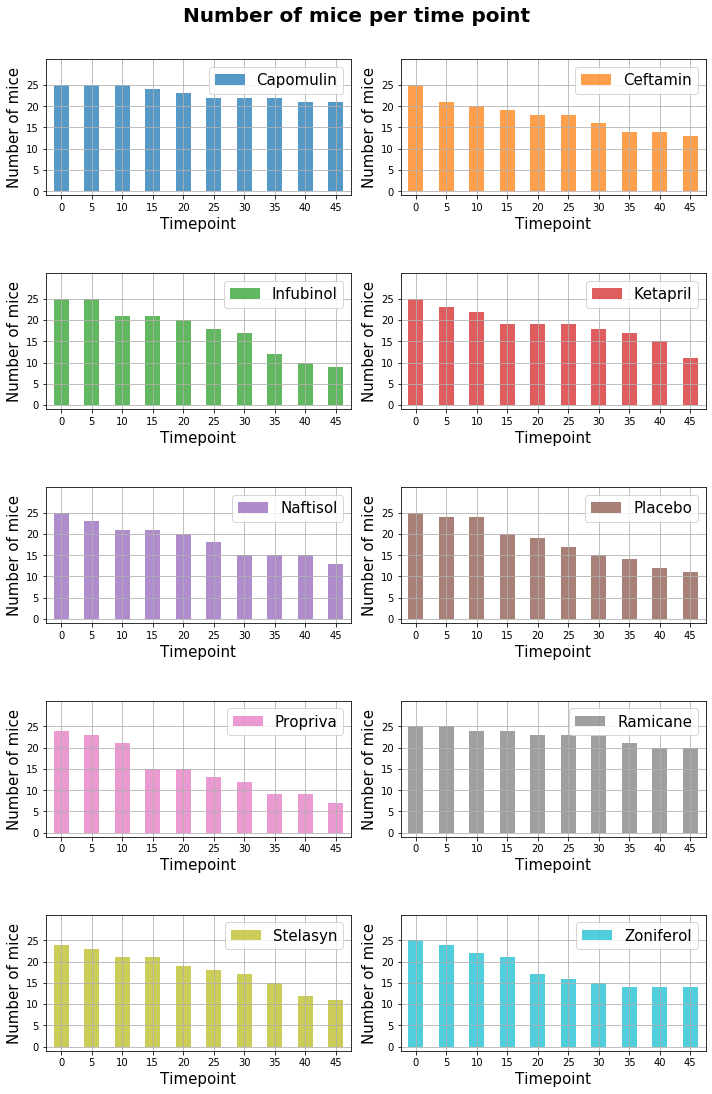

In [624]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Group DF with 'Drug Regimen' and 'Timepoint'
#Convert the 'Timepoint' index as columns
Timepoint_Regime_Mice_Number = DF.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count()
TS_Regime_Mice_Number = Timepoint_Regime_Mice_Number.unstack(level=-1, fill_value=0) #By default level=-1
#TS_Regime_Mice_Number

#Generate subplot layout
fig, axes = plt.subplots(len(TS_Regime_Mice_Number.columns)//2, 2, sharex=False, sharey=False, figsize=(10, 15))
#Flatten the axes array
axes = axes.ravel() #Same as axes.reshape(TS_Regime_Mice_Number.columns.shape)
#Take the default color cycler
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#Plot in loop
for index, col in enumerate(TS_Regime_Mice_Number.columns):
    _=axes[index].bar(x = TS_Regime_Mice_Number.index.to_list(), height= TS_Regime_Mice_Number[col].to_list(), color=colors[index], alpha=0.75, label=col, width=2.5)                
    #xticks, yticks
    _=axes[index].set_xticks(TS_Regime_Mice_Number.index.to_list()) 
    _=axes[index].set_xticklabels(TS_Regime_Mice_Number.index.to_list())
    _=axes[index].set_yticks(np.arange(0, TS_Regime_Mice_Number.max(axis=1).max(axis=0)+1, 5))
    _=axes[index].set_yticklabels(np.arange(0, TS_Regime_Mice_Number.max(axis=1).max(axis=0)+1, 5))
    #xlim, ylim
    _=axes[index].set_xlim(TS_Regime_Mice_Number.index.to_list()[0]-2.5, TS_Regime_Mice_Number.index.to_list()[-1]+2.5)
    _=axes[index].set_ylim(-1, TS_Regime_Mice_Number.max(axis=1).max(axis=0)+6)
    #xlabel, ylabel
    _=axes[index].set_xlabel('Timepoint',fontsize = 15)
    _=axes[index].set_ylabel('Number of mice',fontsize = 15)
    #legend
    _=axes[index].legend(loc='upper right', fontsize = 15)
    #title of individual subplots as a blank line
    _=axes[index].set_title("\n")
    #grid on
    _=axes[index].grid()

_=plt.suptitle('Number of mice per time point', fontsize=20, weight='bold', y=1.01)    
_ = plt.tight_layout()
plt.show()



Plot created using Pandas's DataFrame.plot()


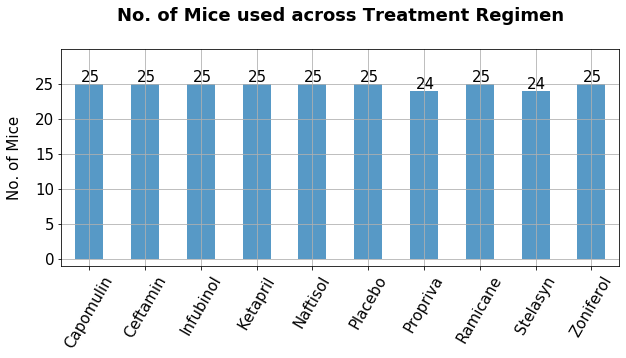

In [625]:
###########################PLEASE READ##################################
# Additional plot as mentioned by Ahmad in slack group(09 Jun: 11:16 PM)
# Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of 
# total mice for each treatment regime throughout the course of the study.

#The below DF contains Mice and the regimen combination
Mice_Regimen_DF = DF.groupby(['Mouse ID', 'Drug Regimen']).aggregate({'Sex':'first'}).reset_index().drop(['Sex'], axis=1)

#Create a column "Number" that corresponds to Mice Count used in each regimen
Regimen_Mice_Count = Mice_Regimen_DF.groupby('Drug Regimen').aggregate(Number = ('Mouse ID', 'count'))
Regimen_Mice_Count.index.name=None

print("Plot created using Pandas's DataFrame.plot()")
#Take the default color cycler
axes = Regimen_Mice_Count.plot(
                           width=0.5,
                           kind = 'bar',
                           figsize=(10,4),
                           grid=True,
                           legend=False,
                           yticks=np.arange(0, int(Regimen_Mice_Count.max())+1, 5),
                           xlim=(-1, len(Regimen_Mice_Count)+1),
                           ylim=(-1, int(Regimen_Mice_Count.max())+5),
                           alpha=0.75,
                           )
_=axes.set_xticklabels(Regimen_Mice_Count.index.to_list(), fontsize=15, rotation=60)
_=axes.set_title("No. of Mice used across Treatment Regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.set_yticklabels(np.arange(0, int(Regimen_Mice_Count.max())+1, 5), fontsize=15)
_=axes.set_ylabel('No. of Mice', fontsize=15)
_=axes.yaxis.set_label_coords(-0.07,0.5)
#Annotation
for p in axes.patches:
    _=axes.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height() * 1.01), fontsize=15)
    
    


Plot created using Matplotlib's pyplot


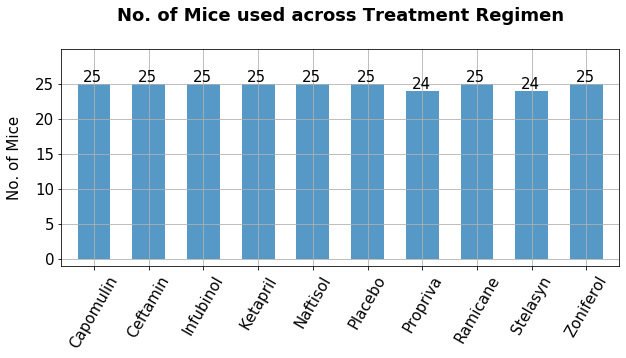

In [626]:
print("Plot created using Matplotlib's pyplot")

fig, axes = plt.subplots(figsize=(10,4))
_=axes.bar(
    x=np.arange(0,len(Regimen_Mice_Count)),  
    height=Regimen_Mice_Count['Number'],
    alpha=0.75,
    width=0.6,
)

#xticks, yticks
_=axes.set_xticks(np.arange(0,len(Regimen_Mice_Count)))
_=axes.set_xticklabels(Regimen_Mice_Count.index.to_list(), fontsize=15, rotation=60)
_=axes.set_yticks(np.arange(0, int(Regimen_Mice_Count.max())+1, 5))
_=axes.set_yticklabels(np.arange(0, int(Regimen_Mice_Count.max())+1, 5), fontsize=15)
#xlabel, #ylabel, #title
_=axes.set_ylabel('No. of Mice', fontsize=15)
_=axes.set_xlim(-0.6,len(Regimen_Mice_Count)-0.4)
_=axes.set_ylim(-1, int(Regimen_Mice_Count.max())+5)
_=axes.set_title("No. of Mice used across Treatment Regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.yaxis.set_label_coords(-0.07,0.5)
#grid
_=axes.grid()
#Annotation
for p in axes.patches:
    _=axes.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height() * 1.01), fontsize=15)

## Pie Plots

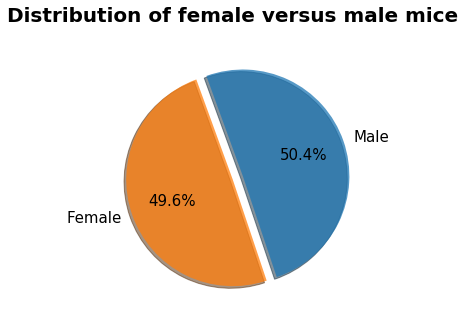

In [627]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group DF with 'Mouse ID' and extract the 'Sex' and take value counts

DF_gender = DF.groupby(['Mouse ID'])['Sex'].first().value_counts()
explode = [(0.1 if gender==DF_gender.idxmax(axis=0) else 0)for gender in DF_gender.index]#Only make the max explode
axes = DF_gender.plot(kind='pie', label='', startangle=110, autopct='%1.1f%%', counterclock=False, explode=explode, shadow=True, colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(DF_gender)], wedgeprops={'alpha':0.75}, fontsize=15)                  
axes.set_aspect("equal")

_=plt.suptitle('Distribution of female versus male mice', fontsize=20, weight='bold', y=1.1)    
_ = plt.tight_layout()
plt.show()


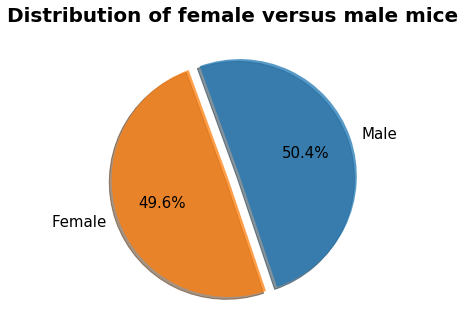

In [628]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Group DF with 'Mouse ID' and extract the 'Sex' and take value counts

DF_gender = DF.groupby(['Mouse ID'])['Sex'].first().value_counts()
explode = [(0.1 if gender==DF_gender.idxmax(axis=0) else 0)for gender in DF_gender.index]#Only make the max explode

fig, ax = plt.subplots()
_ = ax.pie(DF_gender, labels=DF_gender.index, startangle=110, autopct='%1.1f%%', counterclock=False, explode=explode, shadow=True, colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(DF_gender)], wedgeprops={'alpha':0.75}, textprops={'fontsize': 15})   
_=ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


_=plt.suptitle('Distribution of female versus male mice', fontsize=20, weight='bold', y=1.1)    
_ = plt.tight_layout()


_= plt.savefig('../Images/graph2.png', bbox_inches = "tight" )
plt.show()



## Quartiles, Outliers and Boxplots

In [629]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens [Capomulin, Ramicane, Infubinol, Ceftamin]. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Generate indices (Mouse ID, Drug Regimen, Time point) those corresponds to the final tumor volume
Final_Index = DF.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].last().reset_index().set_index(['Mouse ID','Drug Regimen', 'Timepoint']).index

#Extract Final Tumour volumne across drug regimes
Final_Tumor_Volume = DF.copy()
Final_Tumor_Volume.set_index(['Mouse ID', 'Drug Regimen', 'Timepoint'], inplace=True)
Final_Tumor_Volume=Final_Tumor_Volume.loc[Final_Index]['Tumor Volume (mm3)']
Final_Tumor_Volume = Final_Tumor_Volume.reset_index()
#Now we have a DF of 248 rows and 4 columns ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']

###Given####
Most_Promising_Regimes = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Extract the Final Tumour volumes of only the most promising drug regimes (MPDR)
Final_Tumor_Volume_MPDR = Final_Tumor_Volume[Final_Tumor_Volume['Drug Regimen'].isin(Most_Promising_Regimes)].copy()
Final_Tumor_Volume_MPDR.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)' }, inplace=True)
print("Final tumor volume of each mouse across four of the most promising treatment regimens [Capomulin, Ramicane, Infubinol, Ceftamin]")
Final_Tumor_Volume_MPDR
#Calculate Q1, Q3 and IQR for each of these treatment regime
Final_Tumor_Volume_MPDR_Quantiles = Final_Tumor_Volume_MPDR.groupby('Drug Regimen').aggregate(Q1 = ('Final Tumor Volume (mm3)', lambda x: pd.DataFrame(x).quantile(.25)), Q3 = ('Final Tumor Volume (mm3)', lambda x: pd.DataFrame(x).quantile(.75)), IQR = ('Final Tumor Volume (mm3)', lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)))    
print("IQR of final tumor volumes of mice for the regimes [Capomulin, Ramicane, Infubinol, Ceftamin]")
Final_Tumor_Volume_MPDR_Quantiles
#Check for outliers in each of these regimes; Create a new boolean column 
Final_Tumor_Volume_MPDR['Outlier?'] = Final_Tumor_Volume_MPDR.apply(lambda x: True if ((x['Final Tumor Volume (mm3)'] >  (Final_Tumor_Volume_MPDR_Quantiles.loc[x['Drug Regimen'], 'Q3']+(1.5*Final_Tumor_Volume_MPDR_Quantiles.loc[x['Drug Regimen'], 'IQR']))) | (x['Final Tumor Volume (mm3)'] <  (Final_Tumor_Volume_MPDR_Quantiles.loc[x['Drug Regimen'], 'Q1']-(1.5*Final_Tumor_Volume_MPDR_Quantiles.loc[x['Drug Regimen'], 'IQR'])))) else False, axis=1)

#Filter the outlier
print("Display of any outlier in the regimes [Capomulin, Ramicane, Infubinol, Ceftamin]")
Final_Tumor_Volume_MPDR[Final_Tumor_Volume_MPDR['Outlier?']]
print("Though it looks like, Mouse c326 shows tremendous improvement compared to other mice treated with Infubinol,\
fact is, c326 looks like died within 5 days after significant reduction of tumor size")


Final tumor volume of each mouse across four of the most promising treatment regimens [Capomulin, Ramicane, Infubinol, Ceftamin]


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
238,y769,Ceftamin,45,68.594745
239,y793,Capomulin,45,31.896238
240,y865,Ceftamin,45,64.729837
244,z578,Ramicane,45,30.638696


IQR of final tumor volumes of mice for the regimes [Capomulin, Ramicane, Infubinol, Ceftamin]


,Q1,Q3,IQR
Drug Regimen,,,
Capomulin,32.377357,40.159220,7.781863
Ceftamin,48.722078,64.299830,15.577752
Infubinol,54.048608,65.525743,11.477135
Ramicane,31.560470,40.659006,9.098537


Display of any outlier in the regimes [Capomulin, Ramicane, Infubinol, Ceftamin]


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume (mm3),Outlier?
31,c326,Infubinol,5,36.321346,True


Though it looks like, Mouse c326 shows tremendous improvement compared to other mice treated with Infubinol,fact is, c326 looks like died within 5 days after significant reduction of tumor size


,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220


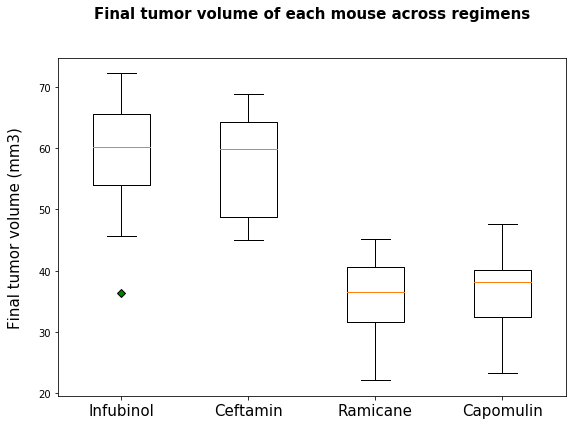

In [630]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

###Reusing some of the code from the previous activity
#Generate indices (Mouse ID, Drug Regimen, Time point) those corresponds to the final tumor volume
Final_Index = DF.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].last().reset_index().set_index(['Mouse ID','Drug Regimen', 'Timepoint']).index

#Extract Final Tumour volumne across drug regimes
Final_Tumor_Volume = DF.copy()
Final_Tumor_Volume.set_index(['Mouse ID', 'Drug Regimen', 'Timepoint'], inplace=True)
Final_Tumor_Volume=Final_Tumor_Volume.loc[Final_Index]['Tumor Volume (mm3)']
Final_Tumor_Volume = Final_Tumor_Volume.reset_index()
#Now we have a DF of 248 rows and 4 columns ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']


Most_Promising_Regimes = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Extract the Final Tumour volumes of only the most promising drug regimes (MPDR)
Final_Tumor_Volume_MPDR = Final_Tumor_Volume[Final_Tumor_Volume['Drug Regimen'].isin(Most_Promising_Regimes)].copy()
Final_Tumor_Volume_MPDR.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)' }, inplace=True)


#Preparation for Box plot
#Now, we need only 'Drug Regimen' and 'Final Tumor Volume (mm3)'
Final_Tumor_Volume_MPDR_sel = Final_Tumor_Volume_MPDR[['Drug Regimen', 'Final Tumor Volume (mm3)']]

#Now, create a dictionary with keys = regime names and value as list of Final Tumor Volume (mm3). Easy peasy with dictionary comprehension !!
Dict_Regime_Final_Tumor_Volume = {regime:Final_Tumor_Volume_MPDR_sel[Final_Tumor_Volume_MPDR_sel['Drug Regimen']==regime]['Final Tumor Volume (mm3)'].to_list() for regime in Final_Tumor_Volume_MPDR_sel['Drug Regimen'].unique()} 
#Diplay this dictionary as DataFrame
pd.DataFrame(Dict_Regime_Final_Tumor_Volume).head(5)

#Time for Box plot
fig, ax = plt.subplots(figsize=(8,6))
green_diamond = dict(markerfacecolor='g', marker='D') #Outlier styling
whiskers, caps, boxes, medians, fliers, _ = ax.boxplot(Dict_Regime_Final_Tumor_Volume.values(), flierprops=green_diamond)
text = ax.set_xticklabels(Dict_Regime_Final_Tumor_Volume.keys(), fontsize=15)
_=ax.set_title("Final tumor volume of each mouse across regimens", fontsize=15, weight='bold', y=1.1)
_=ax.set_ylabel("Final tumor volume (mm3)", fontsize=15)
_=ax.yaxis.set_label_coords(-0.07,0.5)
_ = plt.tight_layout()
_= plt.savefig('../Images/graph3.png', bbox_inches = "tight" )
plt.show()


## Line and Scatter Plots

In [631]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
243,l897,0,45.000000,0,Capomulin,Male,17,19
256,l897,5,45.462243,0,Capomulin,Male,17,19
618,l897,10,46.154737,0,Capomulin,Male,17,19
864,l897,15,44.061521,0,Capomulin,Male,17,19
998,l897,20,44.813093,0,Capomulin,Male,17,19
1164,l897,25,45.354679,0,Capomulin,Male,17,19
1390,l897,30,39.352792,1,Capomulin,Male,17,19
1468,l897,35,37.682767,1,Capomulin,Male,17,19
1749,l897,40,38.343902,1,Capomulin,Male,17,19
1817,l897,45,38.846876,1,Capomulin,Male,17,19


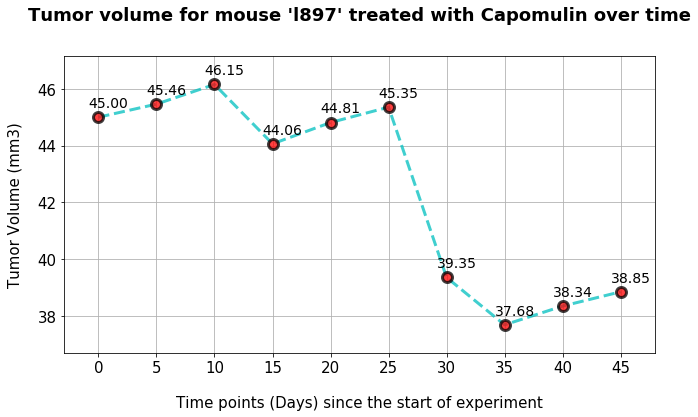

In [632]:
DF_Capolulin = DF[DF['Drug Regimen']=='Capomulin'].copy()

#set a seed, to produce the same output always
random.seed(10) #Change this seed to get a different mouse data
#Randomly sample one mouse
mouse_in_capolulin = random.sample(list(DF_Capolulin['Mouse ID'].unique()), 1)
#Take the Data of only this mouse
DF_mouse_in_capolulin = DF_Capolulin[DF_Capolulin['Mouse ID']==mouse_in_capolulin[0]]
#It looks like, the data is already sorted on Timepoints, but just in case, sort once again !!
DF_mouse_in_capolulin = DF_mouse_in_capolulin.sort_values(by='Timepoint')
DF_mouse_in_capolulin

fig, axes = plt.subplots(figsize=(10,6))
_=axes.plot(
    DF_mouse_in_capolulin['Timepoint'],  
    DF_mouse_in_capolulin['Tumor Volume (mm3)'],
    'co--',
    linewidth='3',
    markeredgewidth=3, markeredgecolor='k', markerfacecolor='r',markersize=10,
    alpha=0.75,
)

#xticks, yticks
_=axes.set_xticks(DF_mouse_in_capolulin['Timepoint'].to_list())
_=axes.set_xticklabels(DF_mouse_in_capolulin['Timepoint'].to_list(), fontsize=15)
_=axes.set_yticks([int(tick) for tick in axes.get_yticks()])
_=axes.set_yticklabels([int(tick) for tick in axes.get_yticks()], fontsize=15)

#xlabel, #ylabel, #title
_=axes.set_ylabel('Tumor Volume (mm3)', fontsize=15)
_=axes.set_xlabel('Time points (Days) since the start of experiment', fontsize=15)
_=axes.set_xlim(DF_mouse_in_capolulin['Timepoint'].min()-3,DF_mouse_in_capolulin['Timepoint'].max()+3)
_=axes.set_ylim(DF_mouse_in_capolulin['Tumor Volume (mm3)'].min()-1, DF_mouse_in_capolulin['Tumor Volume (mm3)'].max()+1)
_=axes.set_title(f"Tumor volume for mouse '{mouse_in_capolulin[0]}' treated with Capomulin over time", fontsize=18,  weight='bold', y=1.1)
_=axes.yaxis.set_label_coords(-0.07,0.5)
_=axes.xaxis.set_label_coords(0.5,-0.14)
#grid
_=axes.grid()

#Annotate
# zip joins x and y coordinates in pairs
for x,y in zip(DF_mouse_in_capolulin['Timepoint'].to_list(),DF_mouse_in_capolulin['Tumor Volume (mm3)'].to_list()):

    label = "{:.2f}".format(y)

    _=axes.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text ('offset pixels'  is the other option)
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontsize=14,
                 color='k') 

#Save
_ = plt.tight_layout()

_= plt.savefig('../Images/graph4.png', bbox_inches = "tight" )
plt.show()

In [633]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

DF_Capolulin = DF[DF['Drug Regimen']=='Capomulin'].copy()
Capolulin_weight_avg_tumor_vol = DF_Capolulin[['Weight (g)', 'Tumor Volume (mm3)']].copy().groupby('Weight (g)').mean()
Capolulin_weight_avg_tumor_vol.reset_index(inplace=True)
Capolulin_weight_avg_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Avg. Tumor Volume (mm3)'}, inplace=True)
Capolulin_weight_avg_tumor_vol

,Weight (g),Avg. Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


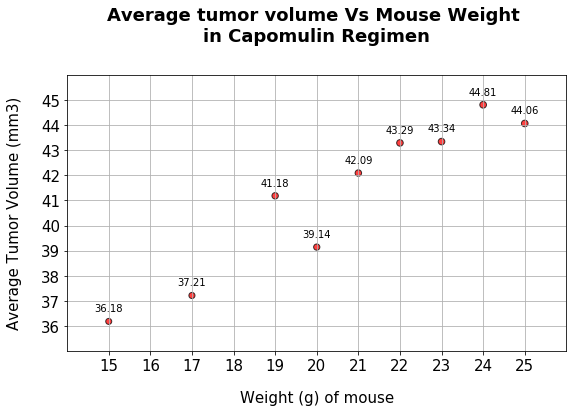

In [634]:
fig, axes = plt.subplots(figsize=(8,6))
_=axes.scatter(Capolulin_weight_avg_tumor_vol['Weight (g)'], Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black",
            s=Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'], alpha=0.75)

#xticks, yticks
_=axes.set_xticks(np.arange(Capolulin_weight_avg_tumor_vol['Weight (g)'].min(), Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1))
_=axes.set_xticklabels(np.arange(Capolulin_weight_avg_tumor_vol['Weight (g)'].min(), Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1), fontsize=15)
_=axes.set_yticks(np.arange(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min()), int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max()+2)))
_=axes.set_yticklabels(np.arange(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min()), int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max()+2))  , fontsize=15)

#xlabel, #ylabel, #title
_=axes.set_ylabel('Average Tumor Volume (mm3)', fontsize=15)
_=axes.set_xlabel('Weight (g) of mouse', fontsize=15)
_=axes.set_xlim(Capolulin_weight_avg_tumor_vol['Weight (g)'].min()-1,Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1)
_=axes.set_ylim(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min())-1, int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max())+2)
_=axes.set_title(f"Average tumor volume Vs Mouse Weight \nin Capomulin Regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.yaxis.set_label_coords(-0.09,0.5)
_=axes.xaxis.set_label_coords(0.5,-0.14)
#grid
_=axes.grid()

#Annotate
# zip joins x and y coordinates in pairs
for x,y in zip(Capolulin_weight_avg_tumor_vol['Weight (g)'].to_list(),Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].to_list()):

    label = "{:.2f}".format(y)

    _=axes.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text ('offset pixels'  is the other option)
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontsize=10,
                 color='k') 


#Save
_ = plt.tight_layout()

_= plt.savefig('../Images/graph5.png', bbox_inches = "tight" )
plt.show()

## Correlation and Regression

In [635]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [636]:
DF_Capolulin = DF[DF['Drug Regimen']=='Capomulin'].copy()
Capolulin_weight_avg_tumor_vol = DF_Capolulin[['Weight (g)', 'Tumor Volume (mm3)']].copy().groupby('Weight (g)').mean()
Capolulin_weight_avg_tumor_vol.reset_index(inplace=True)
Capolulin_weight_avg_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Avg. Tumor Volume (mm3)'}, inplace=True)

#Calculate Pearson Correlation Coefficient
corr, _ = st.pearsonr(Capolulin_weight_avg_tumor_vol['Weight (g)'], Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'])

print(f"The correlation between weight and avg. tumor size is {round(corr,2)}")

The correlation between weight and avg. tumor size is 0.95


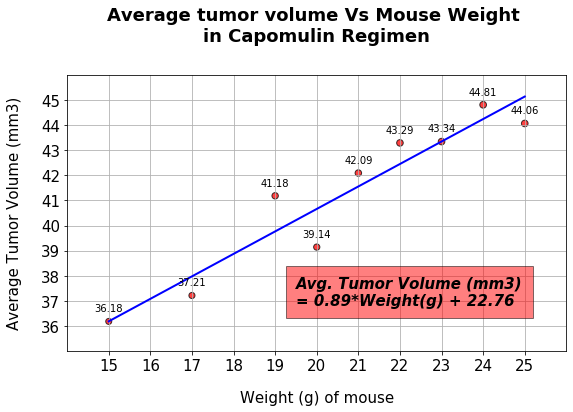

In [637]:
#Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capolulin_weight_avg_tumor_vol['Weight (g)'], Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'])   
#Regressed tumor volume (Predicted)
regress_values_tumor_volume = Capolulin_weight_avg_tumor_vol['Weight (g)'] * slope + intercept

#Regression Eqn
Regression_eq = "Avg. Tumor Volume (mm3)\n= {:.2f}*Weight(g) + {:.2f}".format(slope, intercept)

#Scatter plot
fig, axes = plt.subplots(figsize=(8,6))
_=axes.scatter(Capolulin_weight_avg_tumor_vol['Weight (g)'], Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black",
            s=Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'], alpha=0.75)

#xticks, yticks
_=axes.set_xticks(np.arange(Capolulin_weight_avg_tumor_vol['Weight (g)'].min(), Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1))
_=axes.set_xticklabels(np.arange(Capolulin_weight_avg_tumor_vol['Weight (g)'].min(), Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1), fontsize=15)
_=axes.set_yticks(np.arange(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min()), int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max()+2)))
_=axes.set_yticklabels(np.arange(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min()), int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max()+2))  , fontsize=15)

#xlabel, #ylabel, #title
_=axes.set_ylabel('Average Tumor Volume (mm3)', fontsize=15)
_=axes.set_xlabel('Weight (g) of mouse', fontsize=15)
_=axes.set_xlim(Capolulin_weight_avg_tumor_vol['Weight (g)'].min()-1,Capolulin_weight_avg_tumor_vol['Weight (g)'].max()+1)
_=axes.set_ylim(int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].min())-1, int(Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].max())+2)
_=axes.set_title(f"Average tumor volume Vs Mouse Weight \nin Capomulin Regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.yaxis.set_label_coords(-0.09,0.5)
_=axes.xaxis.set_label_coords(0.5,-0.14)
#grid
_=axes.grid()

#Annotate
# zip joins x and y coordinates in pairs
for x,y in zip(Capolulin_weight_avg_tumor_vol['Weight (g)'].to_list(),Capolulin_weight_avg_tumor_vol['Avg. Tumor Volume (mm3)'].to_list()):

    label = "{:.2f}".format(y)

    _=axes.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text ('offset pixels'  is the other option)
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontsize=10,
                 color='k') 

#Add regression line
_ = axes.plot(Capolulin_weight_avg_tumor_vol['Weight (g)'],regress_values_tumor_volume,"b-", linewidth=2)
 
#Annotation of regression line
_ = axes.annotate(Regression_eq,(19.5,38),fontsize=15, fontweight='bold',
                  backgroundcolor='k',ha='left', va='top',textcoords='offset points', xytext=(0,0), style='italic',
                  bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

#Save
_ = plt.tight_layout()

_= plt.savefig('../Images/graph6.png', bbox_inches = "tight" )
plt.show()


## Observations and Insights  - Helper Section

In [638]:
#There are 2 fundamental questions:
#1. What is the average tumor size in each regimen after the 45 days of treatment?
#2. How catastrophic each treatment is? (Means, how many mice survive 45 days of treatment in each regimen?)

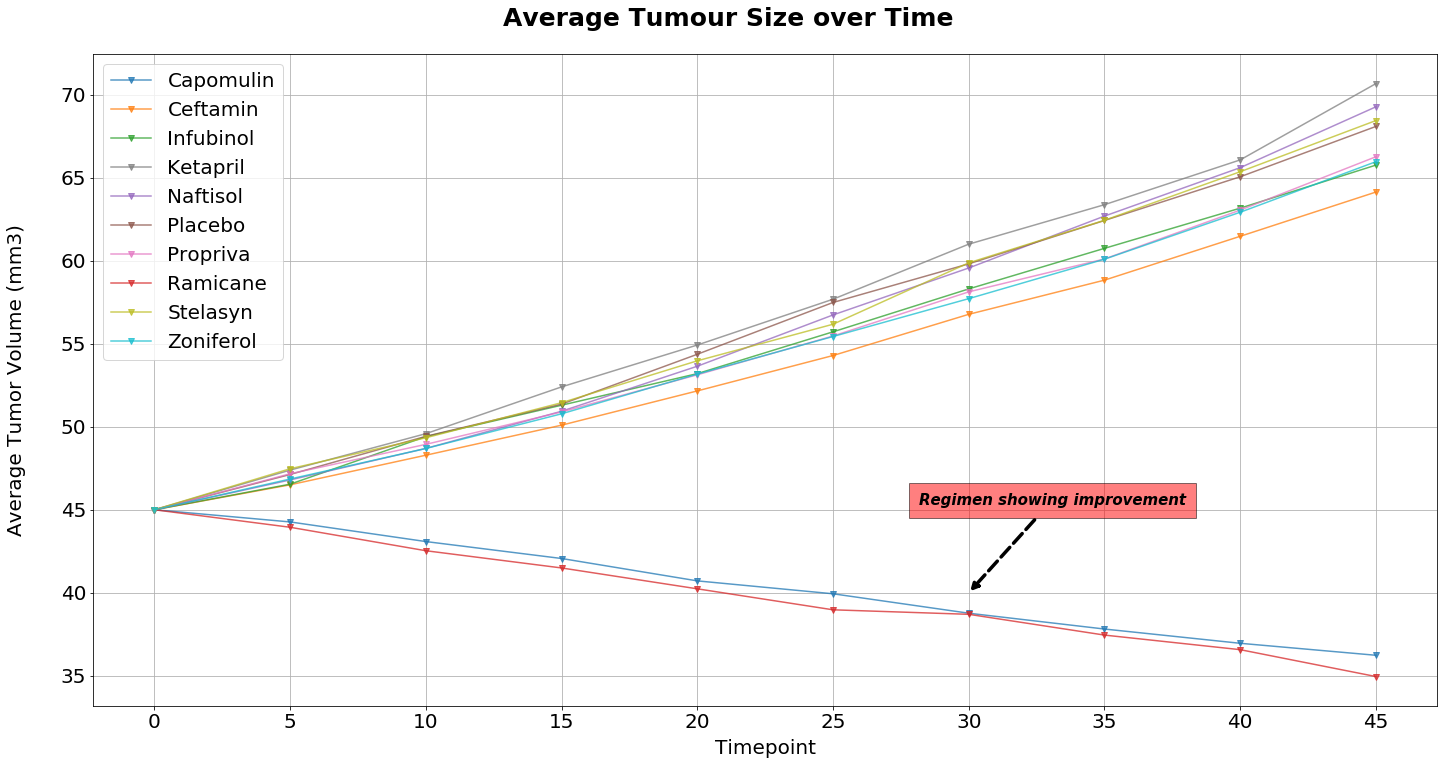

<Figure size 432x288 with 0 Axes>

In [639]:
New_DF = DF.copy()
Tumor_Time_Regimen_Analysis =   New_DF.groupby(['Drug Regimen', 'Timepoint']).aggregate(Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean')).unstack(level=0)            
Tumor_Time_Regimen_Analysis.columns = Tumor_Time_Regimen_Analysis.columns.droplevel(level=0)

axes = Tumor_Time_Regimen_Analysis.plot(
                                        figsize=(20,10),
                                        style='-v',
                                        grid=True,
                                        legend=False, #To get better control on legends
                                        alpha=0.75,
                                        xticks=Tumor_Time_Regimen_Analysis.index,
                                        color=['#1f77b4','#ff7f0e','#2ca02c','#7f7f7f','#9467bd','#8c564b','#e377c2','#d62728','#bcbd22','#17becf']
                                       )

#Beautification !!!
_=plt.suptitle('Average Tumour Size over Time', fontsize=25, weight='bold', y=1.05)
_=axes.legend(loc='upper left',fontsize = 20)
_=axes.set_ylabel('Average Tumor Volume (mm3)',fontsize = 20)
_=axes.yaxis.set_label_coords(-0.05,0.5)
_=axes.set_xlabel('Timepoint',fontsize = 20)

_=axes.xaxis.set_label_coords(0.5,-0.05)
_=[tick.label.set_fontsize(20)  for tick in axes.xaxis.get_major_ticks()]
_=[tick.label.set_fontsize(20)  for tick in axes.yaxis.get_major_ticks()]

#Annotation
_ = axes.annotate("Regimen showing improvement",xy=(30,40), xytext=(-50,100), xycoords='data',fontsize=15, fontweight='bold',
                  backgroundcolor='k',ha='left', va='top',textcoords='offset points', style='italic',
                  bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, arrowprops=dict(arrowstyle= '-|>',
                             color='black',
                             lw=3.5,
                             ls='--'))

_ = plt.tight_layout()
_ = plt.show()
_= plt.savefig('../Images/graph7.png', bbox_inches = "tight" )


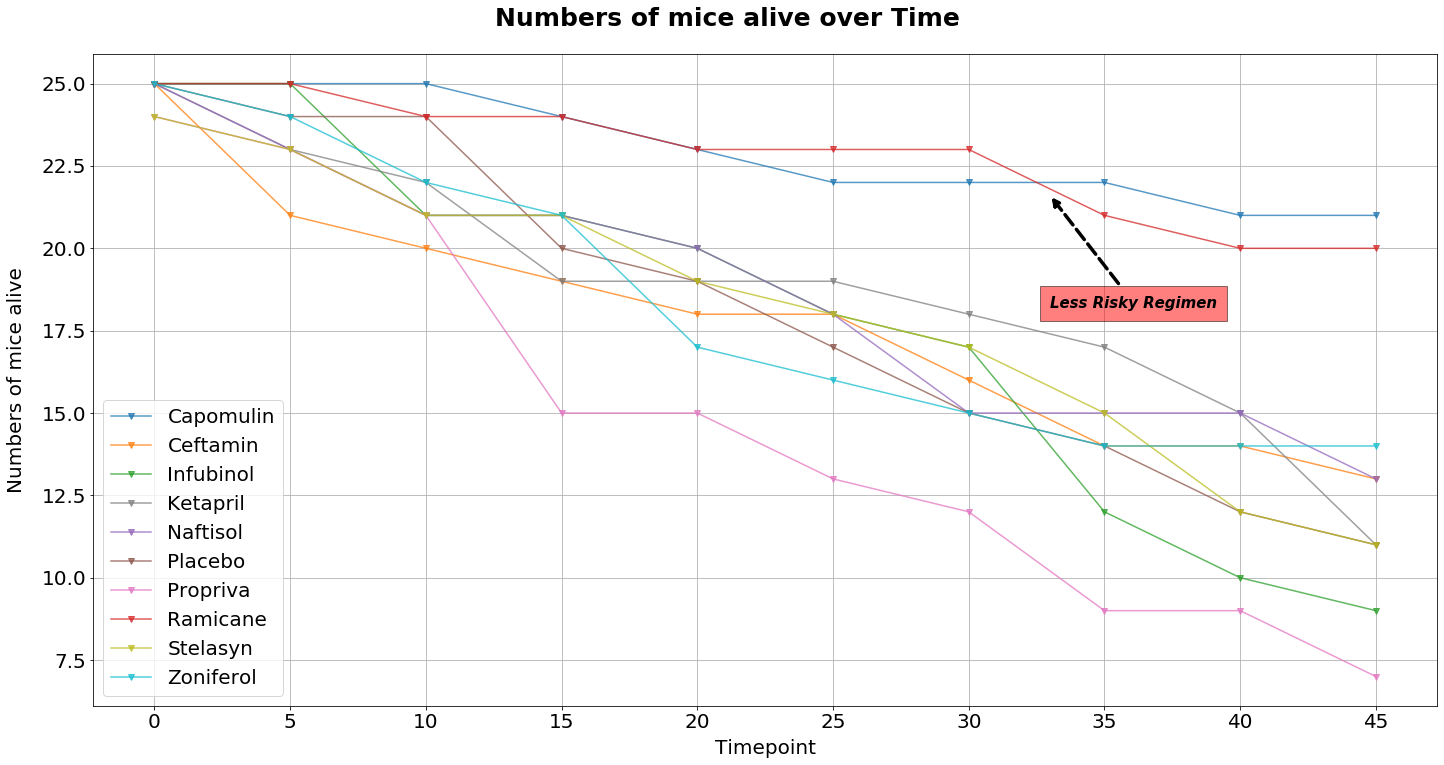

<Figure size 432x288 with 0 Axes>

In [640]:
New_DF = DF.copy()
Number_Time_Regimen_Analysis =   New_DF.groupby(['Drug Regimen', 'Timepoint']).aggregate(Number=('Mouse ID', 'count')).unstack(level=0)            
Number_Time_Regimen_Analysis.columns = Number_Time_Regimen_Analysis.columns.droplevel(level=0)
#Number_Time_Regimen_Analysis


axes = Number_Time_Regimen_Analysis.plot(
                                        figsize=(20,10),
                                        style='-v',
                                        grid=True,
                                        legend=False, #To get better control on legends
                                        alpha=0.75,
                                        xticks=Number_Time_Regimen_Analysis.index,
                                        color=['#1f77b4','#ff7f0e','#2ca02c','#7f7f7f','#9467bd','#8c564b','#e377c2','#d62728','#bcbd22','#17becf']
                                       )

#Beautification !!!
_=plt.suptitle('Numbers of mice alive over Time', fontsize=25, weight='bold', y=1.05)
_=axes.legend(loc='lower left',fontsize = 20)
_=axes.set_ylabel('Numbers of mice alive',fontsize = 20)
_=axes.yaxis.set_label_coords(-0.05,0.5)
_=axes.set_xlabel('Timepoint',fontsize = 20)
_=axes.xaxis.set_label_coords(0.5,-0.05)
_=[tick.label.set_fontsize(20)  for tick in axes.xaxis.get_major_ticks()]
_=[tick.label.set_fontsize(20)  for tick in axes.yaxis.get_major_ticks()]

#Annotation
_ = axes.annotate("Less Risky Regimen",xy=(33,21.6), xycoords='data',xytext=(0,-100), fontsize=15, fontweight='bold',
                  backgroundcolor='k',ha='left', va='top',textcoords='offset points', style='italic',
                  bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, arrowprops=dict(arrowstyle= '-|>',
                             color='black',
                             lw=3.5,
                             ls='--'))

_ = plt.tight_layout()
_ = plt.show()
_= plt.savefig('../Images/graph8.png', bbox_inches = "tight" )

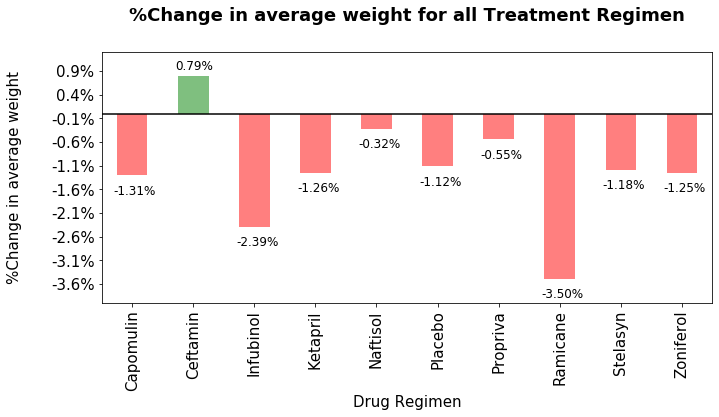

<Figure size 432x288 with 0 Axes>

In [641]:
#Impact of regimen on weights
#Question:- Why average weights of mice chosen for Capomulin and Ramicane are less, compared to others? This has to be asked to researchers

New_DF = DF.copy()
Weight_Time_Regimen_Analysis =   New_DF.groupby(['Drug Regimen', 'Timepoint']).aggregate(Avg_Weight=('Weight (g)', 'mean')).unstack(level=0)            
Weight_Time_Regimen_Analysis.columns = Weight_Time_Regimen_Analysis.columns.droplevel(level=0)

Perc_weight_Reduction = 100*(Weight_Time_Regimen_Analysis.loc[45,:]-Weight_Time_Regimen_Analysis.loc[0,:])/Weight_Time_Regimen_Analysis.loc[0,:]
x_axis = np.arange(len(Perc_weight_Reduction))
colors = Perc_weight_Reduction.map(lambda x: 'r' if x<0 else 'g')

axes = Perc_weight_Reduction.plot(
                           width=0.5,
                           kind = 'bar',
                           figsize=(10,6),
                           grid=False,
                           legend=False,
                           yticks=np.arange(round(Perc_weight_Reduction.min(),2)-0.6, round(Perc_weight_Reduction.max(),2)+0.6, 0.5),
                           xticks=x_axis,
                           xlim=(-1, len(Perc_weight_Reduction)+1),
                           ylim=(int(Perc_weight_Reduction.min())-1, int(Perc_weight_Reduction.max())+1.3),
                           alpha=0.5,
                           color = colors,
                           )
axes.hlines(0, -1, len(Perc_weight_Reduction)+1)
_=axes.set_xticklabels(Perc_weight_Reduction.index, fontsize=15, rotation='vertical')
_=axes.set_title("%Change in average weight for all Treatment Regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.set_yticklabels(["{:.1f}%".format(val) for val in np.arange(round(Perc_weight_Reduction.min(),2)-0.6, round(Perc_weight_Reduction.max(),2)+0.6, 0.5)], fontsize=15)
_=axes.set_ylabel('%Change in average weight', fontsize=15)
_=axes.set_xlabel('Drug Regimen', fontsize=15)
_=axes.yaxis.set_label_coords(-0.13,0.5)
#Annotation
for p in axes.patches:
    _=axes.annotate("{:.2f}%".format(p.get_height()), (p.get_x()-0.05, (p.get_height()-0.4 if p.get_height()<0 else p.get_height()+0.15)), fontsize=12)
    
_ = plt.tight_layout() 
_ = plt.show()
_= plt.savefig('../Images/graph9.png', bbox_inches = "tight" )


0    248
Name: Metastatic Sites, dtype: int64

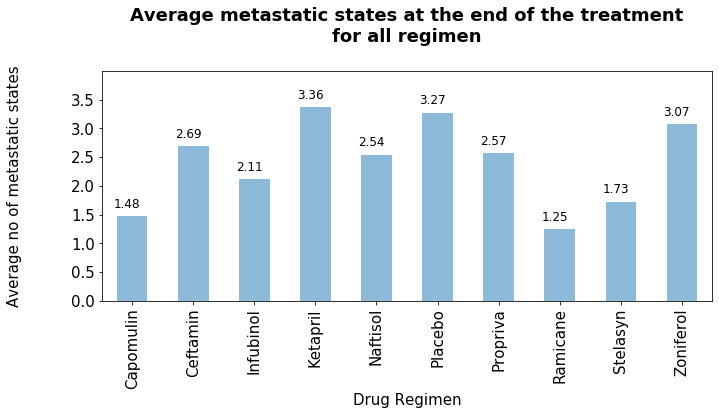

<Figure size 432x288 with 0 Axes>

In [642]:
#How was the metastatic distribution for all regime?
New_DF = DF.copy()
New_DF[New_DF['Timepoint']==0]['Metastatic Sites'].value_counts()
#Initially all mice were having 0 metastatic sites

#How they got distributed later?

#Impact of regimen on metastatic sites
MS_Time_Regimen_Analysis =   New_DF.groupby(['Drug Regimen', 'Timepoint']).aggregate(Avg_MS_Sites=('Metastatic Sites', 'mean')).unstack(level=0)            
MS_Time_Regimen_Analysis.columns = MS_Time_Regimen_Analysis.columns.droplevel(level=0)
MS_Time_Regimen_Final = MS_Time_Regimen_Analysis.loc[45,:]
x_axis = np.arange(len(MS_Time_Regimen_Final))


axes = MS_Time_Regimen_Final.plot(
                           width=0.5,
                           kind = 'bar',
                           figsize=(10,6),
                           grid=False,
                           legend=False,
                           yticks=np.arange(-0.5, round(MS_Time_Regimen_Final.max(),2)+0.6, 0.5),
                           xticks=x_axis,
                           xlim=(-1, len(MS_Time_Regimen_Final)+1),
                           ylim=(0, int(MS_Time_Regimen_Final.max())+1),
                           alpha=0.5,
                           )

_=axes.set_xticklabels(MS_Time_Regimen_Final.index, fontsize=15, rotation='vertical')
_=axes.set_title("Average metastatic states at the end of the treatment\nfor all regimen", fontsize=18,  weight='bold', y=1.1)
_=axes.set_yticklabels(["{:.1f}".format(val) for val in np.arange(-0.5, round(MS_Time_Regimen_Final.max(),2)+0.6, 0.5)], fontsize=15)
_=axes.set_ylabel('Average no of metastatic states', fontsize=15)
_=axes.set_xlabel('Drug Regimen', fontsize=15)
_=axes.yaxis.set_label_coords(-0.13,0.5)
#Annotation
for p in axes.patches:
    _=axes.annotate("{:.2f}".format(p.get_height()), (p.get_x()-0.05, (p.get_height()-0.4 if p.get_height()<0 else p.get_height()+0.15)), fontsize=12)
    
_ = plt.tight_layout()   
_ = plt.show()
_= plt.savefig('../Images/graph10.png', bbox_inches = "tight" )

In [643]:
New_DF = DF.copy()
Weight_Time_Regimen_Analysis =   New_DF.groupby(['Drug Regimen', 'Timepoint']).aggregate(Avg_Weight=('Weight (g)', 'mean')).unstack(level=0)            
Weight_Time_Regimen_Analysis.columns = Weight_Time_Regimen_Analysis.columns.droplevel(level=0)

In [644]:
Weight_Time_Regimen_Analysis.loc[0]

Drug Regimen
Capomulin    20.120000
Ceftamin     27.400000
Infubinol    27.320000
Ketapril     28.080000
Naftisol     27.240000
Placebo      28.040000
Propriva     27.291667
Ramicane     20.000000
Stelasyn     27.875000
Zoniferol    27.920000
Name: 0, dtype: float64

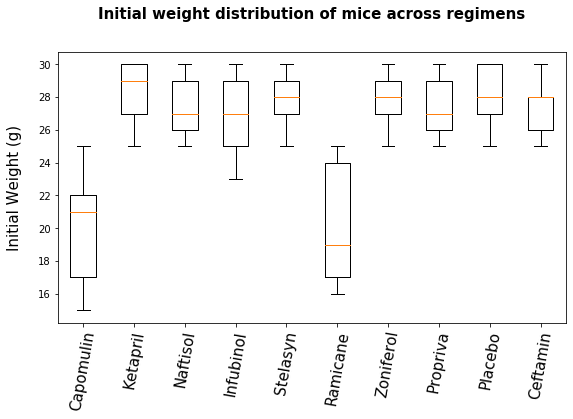

<Figure size 432x288 with 0 Axes>

In [645]:
#Checking bias on weight in the study
Req_DF = New_DF[(New_DF['Timepoint']==0)][['Drug Regimen', 'Weight (g)']]
#Now, create a dictionary with keys = regime names and value as list of initial weights of mice in the regime. Again, Easy peasy with dictionary comprehension !!
Dict_Weight = {regimen:Req_DF[Req_DF['Drug Regimen']==regimen]['Weight (g)'].to_list() for regimen in Req_DF['Drug Regimen'].unique()}
#Plot box plot

#Time for Box plot
fig, ax = plt.subplots(figsize=(8,6))
red_star = dict(markerfacecolor='r', marker='*') #Outlier styling
whiskers, caps, boxes, medians, fliers, _ = ax.boxplot(Dict_Weight.values(), flierprops=red_star)
text = ax.set_xticklabels(Dict_Weight.keys(), fontsize=15, rotation=80)
_=ax.set_title("Initial weight distribution of mice across regimens", fontsize=15, weight='bold', y=1.1)
_=ax.set_ylabel("Initial Weight (g)", fontsize=15)
_=ax.yaxis.set_label_coords(-0.07,0.5)
_ = plt.tight_layout()
_ = plt.show()
_= plt.savefig('../Images/graph11.png', bbox_inches = "tight" )